# Calssificacion Binaria

## Fuente Hotel /Kaggle/DL_COURSE/hotel.csv

### En este modelo predeciremos las cancelaciones de un Hotel

In [9]:
#importamos las librerias necesarias

#parametros para graficar

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
        titleweight='bold' ,titlesize=18, titlepad=10)
plt.rc('animation',html='html5')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from functions import pathfile


C:\Users\ingva\AppData\Local\Temp\ipykernel_3676\1587288017.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [24]:
hotel=pd.read_csv(pathfile())
hotel.head()

C:\Users\ingva\OneDrive\Documents\EstudioML\data\raw\Hotel.csv


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [29]:
#asignamos los valores de X y Y 
X=hotel.copy().drop('is_canceled',axis=1)
y=hotel.pop('is_canceled')


In [30]:
# convertimos los meses en numeros
X['arrival_date_month']= \
X['arrival_date_month'].map(
    {'January':1, 'February':2, 'March':3, 'April':4,
    'May':5, 'June':6,'July':7,'August':8, 'September':9,
    'October':10, 'November':11, 'December':12}
                            )



In [43]:
X['arrival_date_month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6], dtype=int64)

In [51]:
fet_cat=(X.dtypes=='object')
fet_cat=list(fet_cat[fet_cat].index)
fec_cat=[cname for cname in X.columns if len(X[cname].unique())<=10]
fet_num=X.select_dtypes(['int64','float64'])
fet_num=fet_num.columns

print(f"Variables_Categoricas= {fet_cat}\n Variables_Numericas= {fet_num}")

Variables_Categoricas= ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
 Variables_Numericas= Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [68]:
fet_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
fet_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

In [69]:
#pipelines para imputar valores nulos y  standarizamos
transform_num=make_pipeline(SimpleImputer(strategy='constant'),StandardScaler())
transform_cat=make_pipeline(SimpleImputer(strategy='constant', fill_value='NA'),OneHotEncoder(handle_unknown='ignore'))

preprocessor=make_column_transformer((transform_num,fet_num),(transform_cat,fet_cat))

In [70]:
#Realizamos el split
X_train,X_valid,y_train,y_valid =train_test_split(X,y,stratify=y, train_size=0.75)

X_train=preprocessor.fit_transform(X_train)
X_valid=preprocessor.transform(X_valid)

input_shape=[X_train.shape[1]]
X_train.shape

(89542, 63)

In [77]:
#iniciamos el modelo Keras, activacion relu y sigmoid
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid')

])

c:\Users\ingva\anaconda3\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [78]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

Epoch 1/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - binary_accuracy: 0.7450 - loss: 0.5314 - val_binary_accuracy: 0.8039 - val_loss: 0.4400
Epoch 2/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.7986 - loss: 0.4259 - val_binary_accuracy: 0.8097 - val_loss: 0.4047
Epoch 3/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.8068 - loss: 0.4109 - val_binary_accuracy: 0.8163 - val_loss: 0.3955
Epoch 4/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.8107 - loss: 0.4012 - val_binary_accuracy: 0.8188 - val_loss: 0.3917
Epoch 5/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.8149 - loss: 0.3965 - val_binary_accuracy: 0.8213 - val_loss: 0.3875
Epoch 6/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.8175 - loss: 0.3930 - val_binary_accuracy: 0.8204 - val_loss: 0.3897
Epoch 7/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.8176 - loss: 0.3913 - val_binary_accuracy: 0.8239 - val_loss: 0.3827

<Axes: title={'center': 'Accuracy'}>

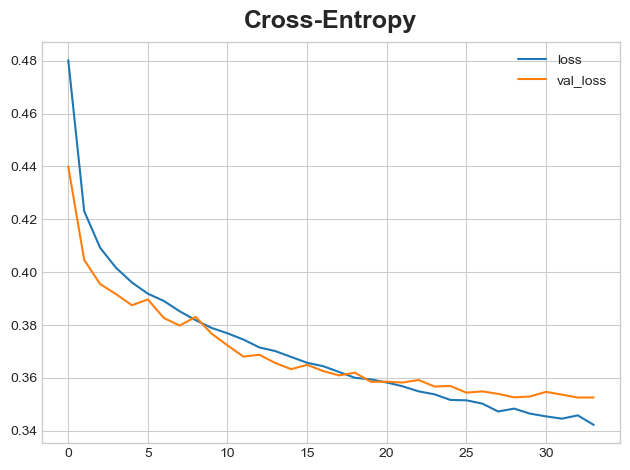

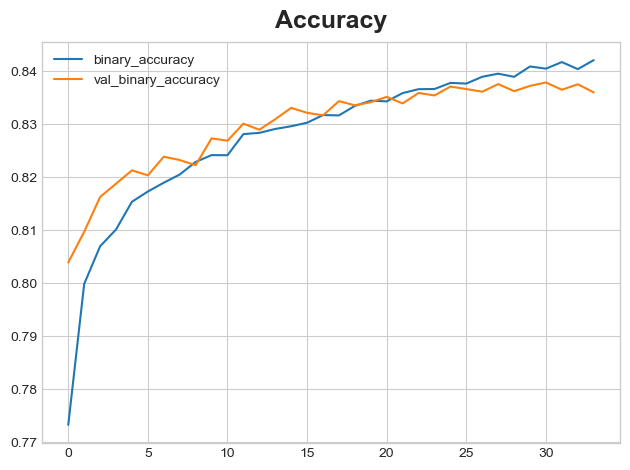

In [79]:
#una vez tenemos el modelo, graficamos las graficas de perdida, agregamos el early_stopping para asegurarnos que no tenemos overfitting

early_stopping=keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

history=model.fit(X_train,y_train,validation_data=[X_valid,y_valid],batch_size=512, epochs= 200, callbacks=[early_stopping])

history_df=pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot(title='Cross-Entropy')
history_df.loc[:,['binary_accuracy','val_binary_accuracy']].plot(title='Accuracy')

In [80]:
predicts=model.predict(X_valid)

933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [84]:
predicts

array([[0.17543669],
       [0.41061062],
       [0.69111323],
       ...,
       [0.06173322],
       [0.05524274],
       [0.12462395]], dtype=float32)